---

## [미니프로젝트] 서울시 공유자전거 '따릉이'의 수요 예측

### 여러분은 서울시 정책 연구원으로서 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

### ▣ 우리가 풀어야 하는 문제는 무엇인가요?

 - 어떠한 날씨요소가 따릉이 수요와 관련 있는지 분석하여 인사이트를 도출해봅시다

---

## ▣ 데이터 소개
[기본 데이터]
* 데이터 : sbikedata.csv

## ▣ 데이터셋의 변수 소개
* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

---

### [Step1] 환경 설정
#### <span style="color: green"> 1) 라이브러리 불러오기 </span>

In [1]:
#EDA에 사용할 라이브러리를 import 하세요
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as spst

#### <span style="color: green"> 2) 활용할 데이터 불러오기 </span>

In [2]:
#이번 프로젝트에서 분석할 데이터를 불러오세요
data = pd.read_csv('sbikedata.csv')
data.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30


### [Step2] 가설설정
#### '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

#### 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

로 가설이 자연스레 수립 됩니다.



---


#### <span style="color: green"> 'precipitation' 등의 변수를 포함하여, 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요. </span>

##### Guide : Target은 따릉이 대여량 입니다.

- 가설 1(예시) : ㅇ 귀무가설: 강우 여부와 따릉이간에는 연관성이 없다.
    
    ㅇ 대립가설 : 강우 여부와 따릉이 대여량 간에는 연관성이 있다.


- 가설 2 : ㅇ 귀무가설 : 미세먼지 수치와 따릉이 간에는 연관성이 없다.

    ㅇ  대립가설 : 미세먼지 수치와 따릉이 간에는 연관성이 있다.


- 가설 3 : ㅇ 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.

    ㅇ  대립가설 : 온도와 따릉이 간에는 연관성이 있다.


- 가설 4 : ㅇ 귀무가설 : 강우 여부와 따릉이 간에는 연관성이 없다.

    ㅇ  대립가설 : 강우 여부와 따릉이 간에는 연관성이 있다.


- 가설 5 : ㅇ 귀무가설 : 풍속과 따릉이 간에는 연관성이 없다.

    ㅇ  대립가설 : 풍속과 따릉이 간에는 연관성이 있다.


- 가설 6 : ㅇ 귀무가설 : 습도와 따릉이 간에는 연관성이 없다.

    ㅇ  대립가설 : 습도와 따릉이 간에는 연관성이 있다.

### [Step3] 단변량 분석

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

### Feature1 : hour

1. 변수가 내포하고 있는 의미

- 변수의 의미를 한번 짚고 넘어갑시다.
hour 변수는 어떤 의미를 가지고 있나요?

2. 변수가 수치형인지 범주형인지


In [3]:
#변수의 자료형을 확인해보세요.
data['hour'].dtype

dtype('int64')

3. 변수의 결측치 존재 여부 및 조치방안

In [4]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['hour'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: hour
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB


4. 변수의 기초 통계량 확인

In [5]:
#변수의 기초 통계량을 확인해보세요.
data['hour'].describe()

count    5827.000000
mean       11.506607
std         6.921963
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        23.000000
Name: hour, dtype: float64

5. 변수의 분포 확인

<AxesSubplot:xlabel='hour', ylabel='Count'>

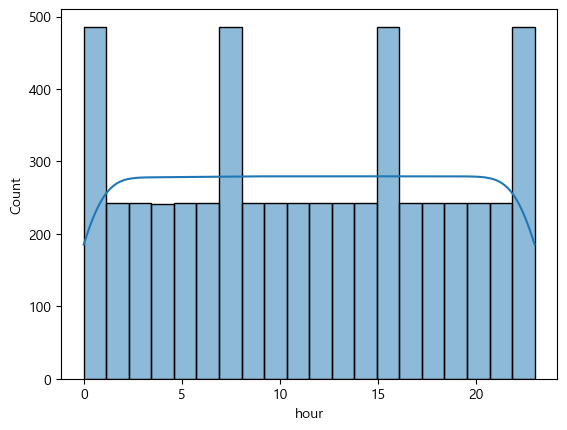

In [6]:
#변수의 분포를 확인해보세요.
sns.histplot(x='hour', data=data, bins=20, kde=True)

<AxesSubplot:xlabel='hour'>

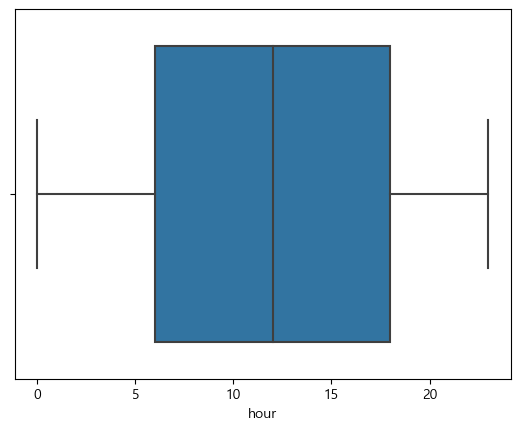

In [7]:
sns.boxplot(x=data['hour'])

6. 위 정보로 부터 파악한 내용 정리

In [8]:
#위 정보로부터 파악하신 내용을 정리해보세요.

# 주로 6시에서 18시 사이에 사용을 함 

7. 추가 분석사항 도출

In [9]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature2 : temperature

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [10]:
#변수의 자료형을 확인해보세요.
data['temperature'].dtype

dtype('float64')

3. 변수의 결측치 존재 여부 및 조치방안

In [11]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['temperature'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: temperature
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


4. 변수의 기초 통계량 확인

In [12]:
#변수의 기초 통계량을 확인해보세요
data['temperature'].describe()

count    5827.000000
mean       19.376798
std         7.501572
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64

5. 변수의 분포 확인

<AxesSubplot:xlabel='temperature', ylabel='Count'>

c:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


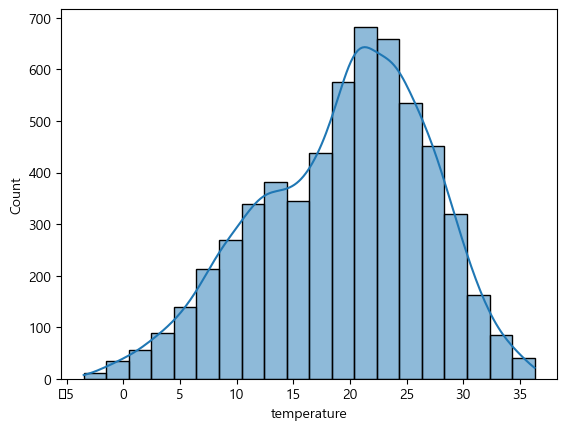

In [13]:
#변수의 분포를 확인해보세요.
sns.histplot(x='temperature', data=data, bins=20, kde=True)

<AxesSubplot:xlabel='temperature'>

c:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


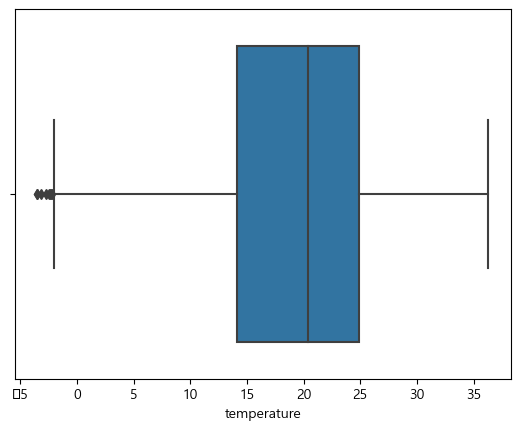

In [14]:
sns.boxplot(x=data['temperature'])

6. 위 정보로 부터 파악한 내용 정리

In [15]:
#위 정보로부터 파악하신 내용을 정리해보세요.


7. 추가 분석사항 도출

In [16]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature3 : precipitation

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [17]:
#변수의 자료형을 확인해보세요.
data['precipitation'].dtype

dtype('int64')

3. 변수의 결측치 존재 여부 및 조치방안

In [18]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['precipitation'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: precipitation
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB


4. 변수의 기초 통계량 확인

In [19]:
#변수의 기초 통계량을 확인해보세요
data['precipitation'].value_counts()

0    5387
1     440
Name: precipitation, dtype: int64

In [20]:
data['precipitation'].value_counts() / data.shape[0]

0    0.924489
1    0.075511
Name: precipitation, dtype: float64

5. 변수의 분포 확인

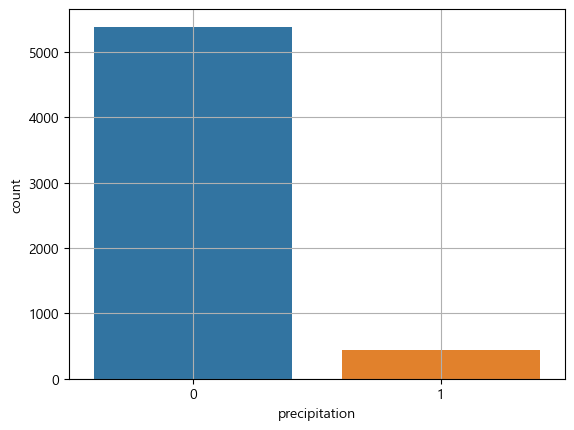

In [21]:
#변수의 분포를 확인해보세요.
sns.countplot(x='precipitation', data=data)
plt.grid()

6. 위 정보로 부터 파악한 내용 정리

In [22]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [23]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature4 : windspeed

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [24]:
#변수의 자료형을 확인해보세요.
data['windspeed'].dtype

dtype('float64')

3. 변수의 결측치 존재 여부 및 조치방안

In [25]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['windspeed'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: windspeed
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


4. 변수의 기초 통계량 확인

In [26]:
#변수의 기초 통계량을 확인해보세요
data['windspeed'].describe()

count    5827.000000
mean        2.237601
std         1.054516
min         0.000000
25%         1.500000
50%         2.200000
75%         2.800000
max         8.300000
Name: windspeed, dtype: float64

5. 변수의 분포 확인

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

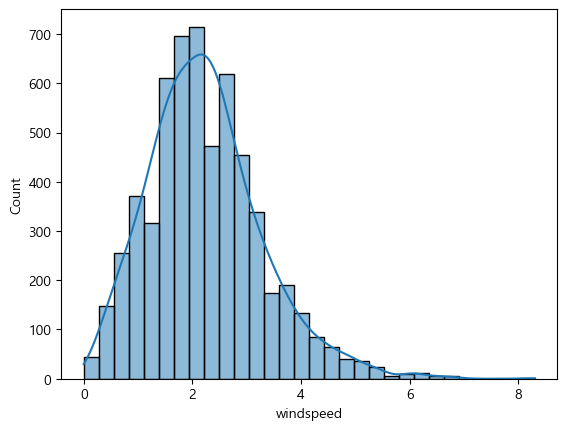

In [27]:
#변수의 분포를 확인해보세요.
sns.histplot(x='windspeed', data=data, bins=30, kde=True)

<AxesSubplot:xlabel='windspeed'>

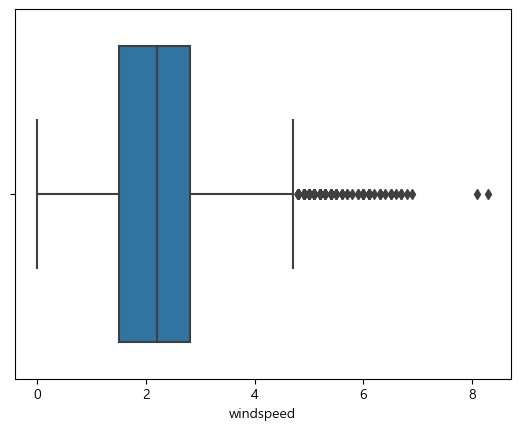

In [28]:
sns.boxplot(x='windspeed', data=data)

6. 위 정보로 부터 파악한 내용 정리

In [29]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [30]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature5 : humidity

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [31]:
#변수의 자료형을 확인해보세요.
data['humidity'].dtype

dtype('int64')

3. 변수의 결측치 존재 여부 및 조치방안

In [32]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['humidity'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: humidity
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB


4. 변수의 기초 통계량 확인

In [33]:
#변수의 기초 통계량을 확인해보세요
data['humidity'].describe()

count    5827.000000
mean       68.608718
std        17.277266
min        19.000000
25%        56.000000
50%        70.000000
75%        82.000000
max       100.000000
Name: humidity, dtype: float64

5. 변수의 분포 확인

<AxesSubplot:xlabel='humidity', ylabel='Count'>

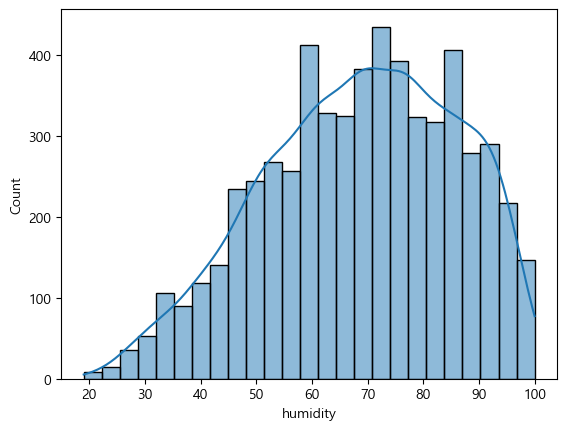

In [34]:
#변수의 분포를 확인해보세요.
sns.histplot(x='humidity', data=data, bins=25, kde=True)

<AxesSubplot:xlabel='humidity'>

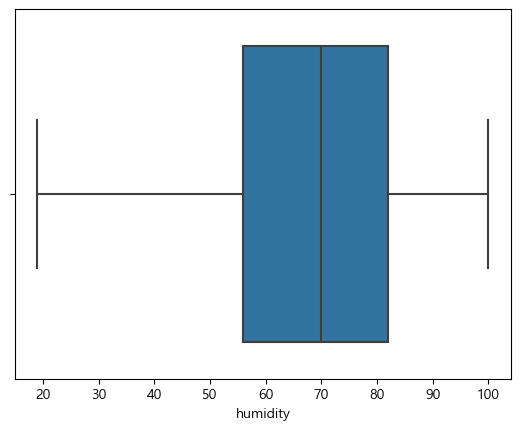

In [35]:
sns.boxplot(x='humidity', data=data)

6. 위 정보로 부터 파악한 내용 정리

In [36]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [37]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature6 : visibility

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [38]:
#변수의 자료형을 확인해보세요.
data['visibility'].dtype

dtype('int64')

3. 변수의 결측치 존재 여부 및 조치방안

In [39]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['visibility'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: visibility
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB


4. 변수의 기초 통계량 확인

In [40]:
#변수의 기초 통계량을 확인해보세요
data['visibility'].describe()

count    5827.000000
mean     1758.438648
std       490.969394
min        60.000000
25%      1935.500000
50%      2000.000000
75%      2000.000000
max      2000.000000
Name: visibility, dtype: float64

5. 변수의 분포 확인

<AxesSubplot:xlabel='visibility', ylabel='Count'>

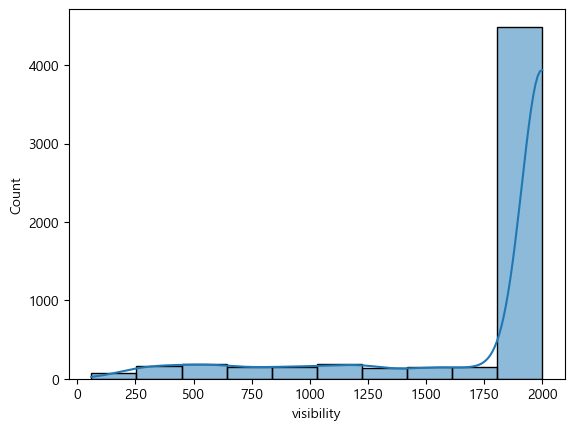

In [41]:
#변수의 분포를 확인해보세요.
sns.histplot(x='visibility', data=data, bins=10, kde=True)

<AxesSubplot:xlabel='visibility'>

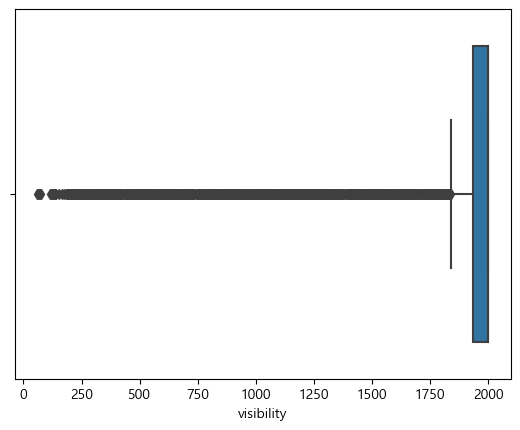

In [42]:
sns.boxplot(x='visibility', data=data)

6. 위 정보로 부터 파악한 내용 정리

In [43]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [44]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature7 : ozone

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [45]:
#변수의 자료형을 확인해보세요.
data['ozone'].dtype

dtype('float64')

3. 변수의 결측치 존재 여부 및 조치방안

In [46]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['ozone'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: ozone
Non-Null Count  Dtype  
--------------  -----  
5699 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


4. 변수의 기초 통계량 확인

In [47]:
#변수의 기초 통계량을 확인해보세요
data['ozone'].describe()

count    5699.000000
mean        0.031811
std         0.018277
min         0.001000
25%         0.019000
50%         0.031000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64

5. 변수의 분포 확인

<AxesSubplot:xlabel='ozone', ylabel='Count'>

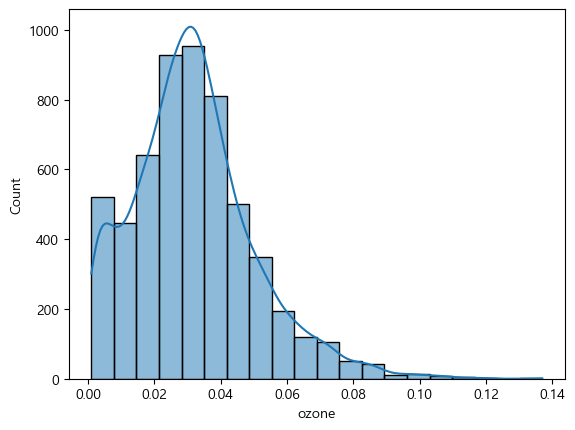

In [48]:
#변수의 분포를 확인해보세요.
sns.histplot(x='ozone', data=data, bins=20, kde=True)

<AxesSubplot:xlabel='ozone'>

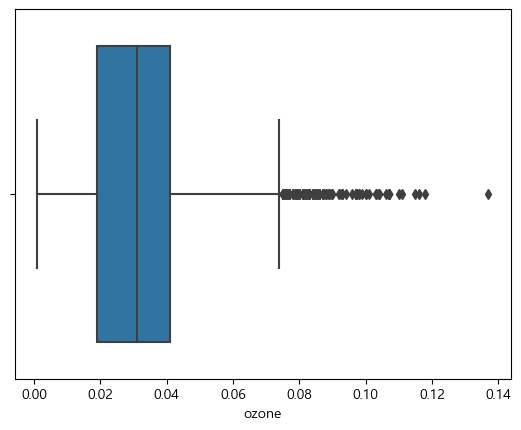

In [49]:
sns.boxplot(x='ozone', data=data)

6. 위 정보로 부터 파악한 내용 정리

In [50]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [51]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature8 : PM10

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [52]:
#변수의 자료형을 확인해보세요.
data['PM10'].dtype

dtype('float64')

3. 변수의 결측치 존재 여부 및 조치방안

In [53]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['PM10'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: PM10
Non-Null Count  Dtype  
--------------  -----  
5725 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


4. 변수의 기초 통계량 확인

In [54]:
#변수의 기초 통계량을 확인해보세요
data['PM10'].describe()

count    5725.000000
mean       31.970655
std        42.987292
min         3.000000
25%        16.000000
50%        25.000000
75%        37.000000
max       827.000000
Name: PM10, dtype: float64

5. 변수의 분포 확인

<AxesSubplot:xlabel='PM10', ylabel='Count'>

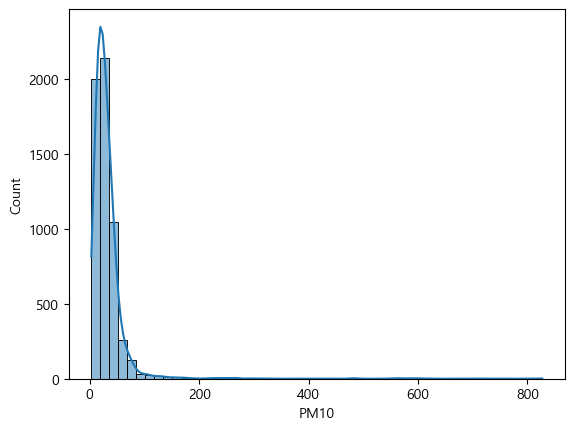

In [55]:
#변수의 분포를 확인해보세요.
sns.histplot(x='PM10', data=data, bins=50, kde=True)

<AxesSubplot:xlabel='PM10'>

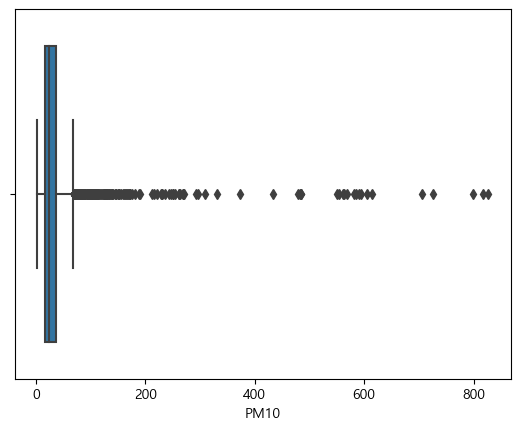

In [56]:
sns.boxplot(x='PM10', data=data)

6. 위 정보로 부터 파악한 내용 정리

In [57]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [58]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature9 : PM2.5

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [59]:
#변수의 자료형을 확인해보세요.
data['PM2.5'].dtype

dtype('float64')

3. 변수의 결측치 존재 여부 및 조치방안

In [60]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['PM2.5'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: PM2.5
Non-Null Count  Dtype  
--------------  -----  
5732 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


4. 변수의 기초 통계량 확인

In [61]:
#변수의 기초 통계량을 확인해보세요
data['PM2.5'].describe()

count    5732.000000
mean       15.666609
std        13.850990
min         1.000000
25%         7.000000
50%        13.000000
75%        20.000000
max       125.000000
Name: PM2.5, dtype: float64

5. 변수의 분포 확인

<AxesSubplot:xlabel='PM2.5', ylabel='Count'>

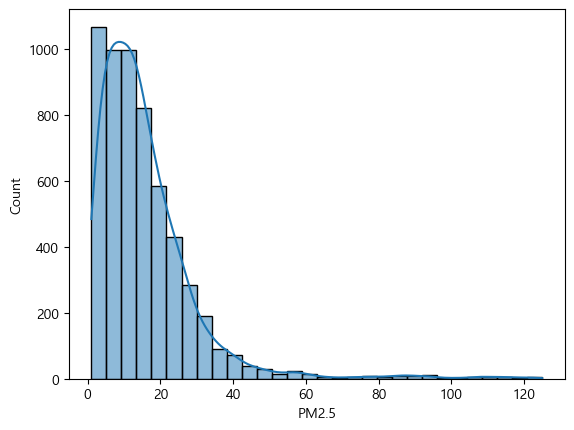

In [62]:
#변수의 분포를 확인해보세요.
sns.histplot(x='PM2.5', data=data, bins=30, kde=True)

<AxesSubplot:xlabel='PM2.5'>

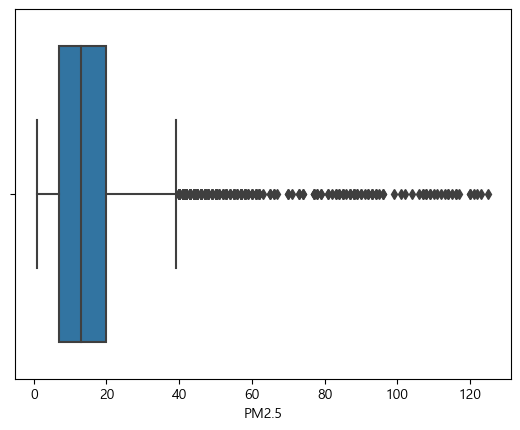

In [63]:
sns.boxplot(x='PM2.5', data=data)

6. 위 정보로 부터 파악한 내용 정리

In [64]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [65]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Count (Target)

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [66]:
#변수의 자료형을 확인해보세요.
data['count'].dtype

dtype('int64')

3. 변수의 결측치 존재 여부 및 조치방안

In [67]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['count'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: count
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB


4. 변수의 기초 통계량 확인

In [68]:
#변수의 기초 통계량을 확인해보세요
data['count'].describe()

count    5827.000000
mean      215.117899
std       185.972900
min         1.000000
25%        53.000000
50%       186.000000
75%       315.000000
max      1746.000000
Name: count, dtype: float64

5. 변수의 분포 확인

<AxesSubplot:xlabel='count', ylabel='Count'>

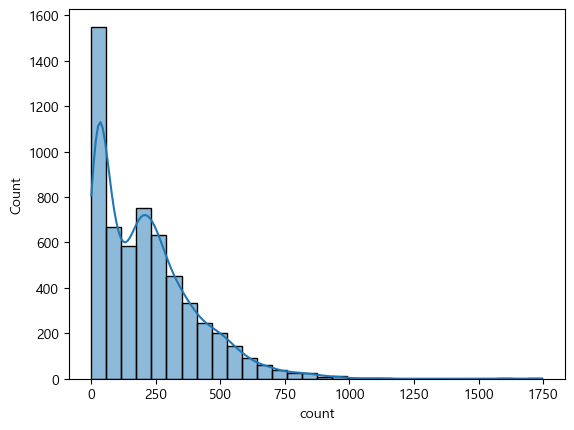

In [69]:
#변수의 분포를 확인해보세요.
sns.histplot(x='count', data=data, bins=30, kde=True)

<AxesSubplot:xlabel='count'>

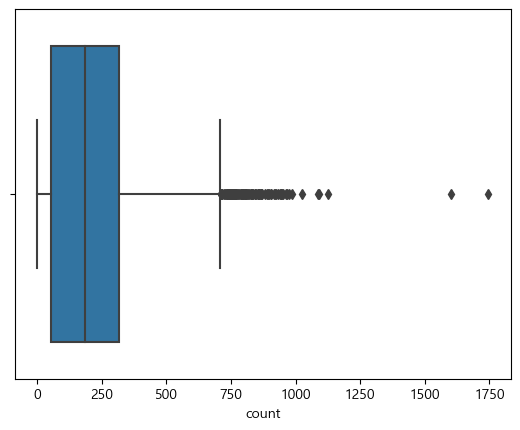

In [70]:
sns.boxplot(x='count', data=data)

6. 위 정보로 부터 파악한 내용 정리

In [71]:
#위 정보로부터 파악하신 내용을 정리해보세요.

7. 추가 분석사항 도출

In [72]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

In [73]:
data.describe()

,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
count,5827.000000,5725.000000,5732.000000,5699.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000
mean,11.506607,31.970655,15.666609,0.031811,19.376798,0.075511,2.237601,68.608718,1758.438648,215.117899
std,6.921963,42.987292,13.850990,0.018277,7.501572,0.264236,1.054516,17.277266,490.969394,185.972900
min,0.000000,3.000000,1.000000,0.001000,-3.500000,0.000000,0.000000,19.000000,60.000000,1.000000
25%,6.000000,16.000000,7.000000,0.019000,14.100000,0.000000,1.500000,56.000000,1935.500000,53.000000
50%,12.000000,25.000000,13.000000,0.031000,20.400000,0.000000,2.200000,70.000000,2000.000000,186.000000
75%,18.000000,37.000000,20.000000,0.041000,24.900000,0.000000,2.800000,82.000000,2000.000000,315.000000
max,23.000000,827.000000,125.000000,0.137000,36.300000,1.000000,8.300000,100.000000,2000.000000,1746.000000


In [74]:
data[data['PM10'].isnull()]

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
274,2021-04-12,11,NaN,NaN,NaN,16.9,0,2.8,41,2000,117
275,2021-04-12,12,NaN,NaN,NaN,17.6,0,3.9,39,2000,73
276,2021-04-12,13,NaN,NaN,0.038,16.6,0,3.8,48,1974,10
538,2021-04-23,11,NaN,NaN,NaN,20.5,0,4.4,42,2000,261
539,2021-04-23,12,NaN,NaN,NaN,20.6,0,4.4,32,2000,258
...,...,...,...,...,...,...,...,...,...,...,...
5147,2021-11-01,17,NaN,NaN,NaN,14.8,0,2.6,61,2000,525
5503,2021-11-16,13,NaN,NaN,NaN,12.5,0,2.6,36,2000,227
5504,2021-11-16,14,NaN,NaN,NaN,13.3,0,2.9,35,2000,178
5505,2021-11-16,15,NaN,NaN,NaN,13.3,0,3.3,37,2000,233


In [75]:
data['PM10'].isna().sum()

102

In [76]:
data = data.dropna(axis=0)

In [77]:
data.isna().sum()

date             0
hour             0
PM10             0
PM2.5            0
ozone            0
temperature      0
precipitation    0
windspeed        0
humidity         0
visibility       0
count            0
dtype: int64

In [78]:
data['PM10'].describe()

count    5670.000000
mean       31.580423
std        42.811991
min         3.000000
25%        16.000000
50%        24.500000
75%        37.000000
max       827.000000
Name: PM10, dtype: float64

<AxesSubplot:xlabel='PM10', ylabel='Count'>

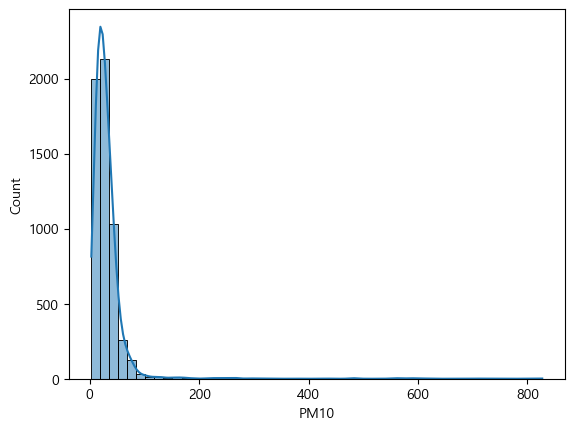

In [79]:
sns.histplot(x='PM10', data=data, bins=50, kde=True)

<AxesSubplot:xlabel='PM10'>

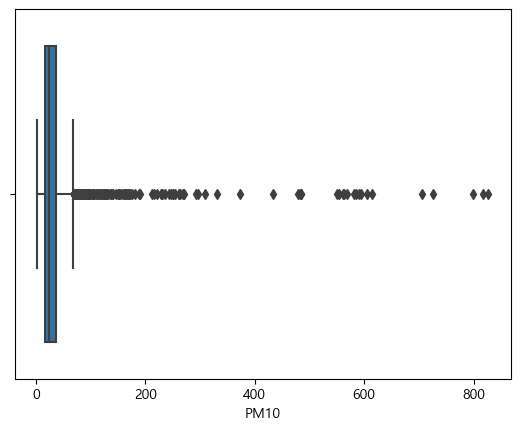

In [80]:
sns.boxplot(x='PM10', data=data)

In [81]:
data['PM2.5'].describe()

count    5670.000000
mean       15.332451
std        12.860270
min         1.000000
25%         7.000000
50%        13.000000
75%        20.000000
max       125.000000
Name: PM2.5, dtype: float64

<AxesSubplot:xlabel='PM2.5', ylabel='Count'>

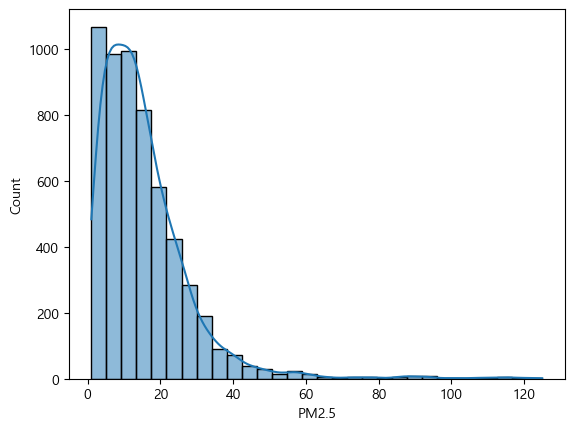

In [82]:
sns.histplot(x='PM2.5', data=data, bins=30, kde=True)

<AxesSubplot:xlabel='PM2.5'>

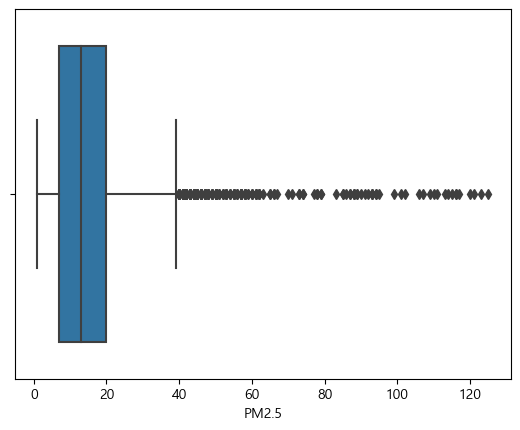

In [83]:
sns.boxplot(x='PM2.5', data=data)

In [84]:
data['ozone'].describe()

count    5670.000000
mean        0.031793
std         0.018250
min         0.001000
25%         0.019000
50%         0.031000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64

<AxesSubplot:xlabel='ozone', ylabel='Count'>

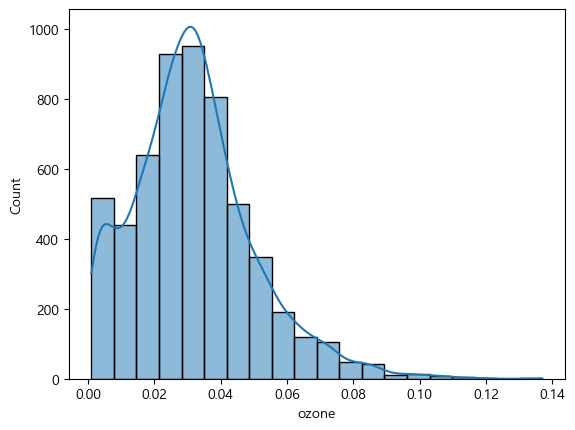

In [85]:
sns.histplot(x='ozone', data=data, bins=20, kde=True)

<AxesSubplot:xlabel='ozone'>

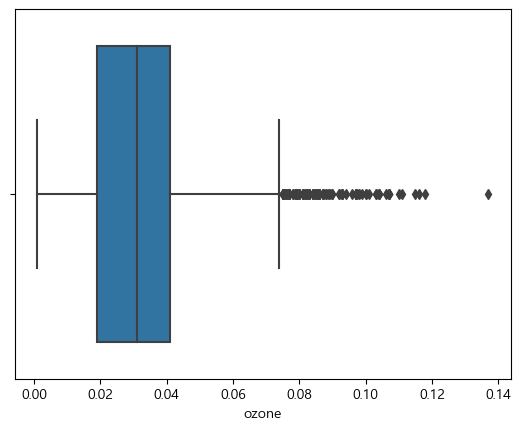

In [86]:
sns.boxplot(x='ozone', data=data)

In [87]:
data.describe()

,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
count,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.000000,5670.00000,5670.000000,5670.000000
mean,11.495238,31.580423,15.332451,0.031793,19.418959,0.075309,2.231217,68.61552,1763.198765,215.869841
std,6.953965,42.811991,12.860270,0.018250,7.455268,0.263912,1.046569,17.28755,484.862120,186.974342
min,0.000000,3.000000,1.000000,0.001000,-3.500000,0.000000,0.000000,19.00000,60.000000,1.000000
25%,5.000000,16.000000,7.000000,0.019000,14.200000,0.000000,1.500000,56.00000,1943.000000,53.000000
50%,11.000000,24.500000,13.000000,0.031000,20.500000,0.000000,2.150000,70.00000,2000.000000,186.000000
75%,18.000000,37.000000,20.000000,0.041000,24.900000,0.000000,2.800000,82.00000,2000.000000,317.000000
max,23.000000,827.000000,125.000000,0.137000,36.300000,1.000000,8.300000,100.00000,2000.000000,1746.000000


### [Step4] 이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)을 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

#### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.</font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : t-test, anova
        3. 관계 평가 (가설 검정)

1. 강수 여부와 따릉이 대여량간 이변량 분석

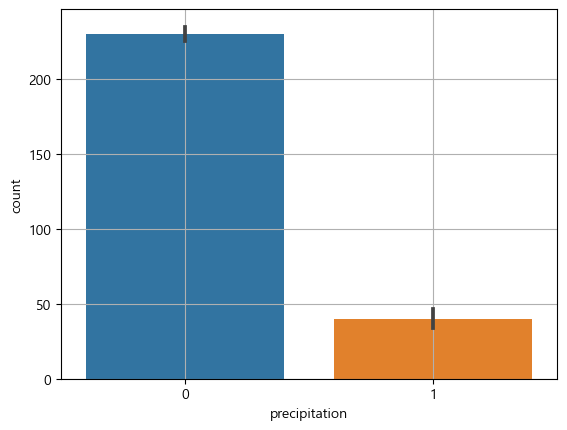

In [88]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.barplot(x='precipitation', y='count', data=data)
plt.grid()

In [153]:
not_rain = data.loc[data['precipitation']==0, 'count']
rain = data.loc[data['precipitation']==1, 'count']
spst.ttest_ind(not_rain, rain, equal_var=False)

Ttest_indResult(statistic=45.00125068523365, pvalue=1.189667563571448e-246)

#### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  </font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : 상관분석
        3. 관계 평가 (가설 검정)

2. 시간대별 데이터와 따릉이 대여량간 분석

In [90]:
#데이터 타입에 주의하여 이변량 분석을 해보세요

3. 온도 데이터와 따릉이 대여량간 분석

c:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


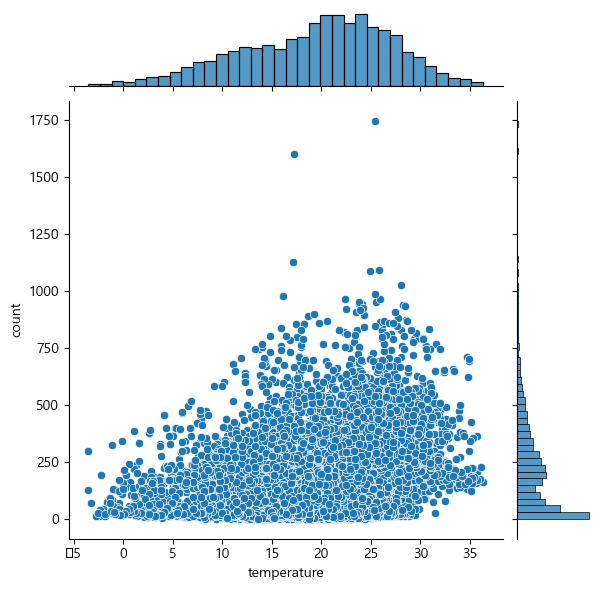

In [91]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.jointplot(x='temperature', y='count', data=data)

In [92]:
spst.pearsonr(x=data['temperature'], y=data['count'])

PearsonRResult(statistic=0.27416222788541533, pvalue=2.585011313554534e-98)

4. 풍속 데이터와 따릉이 대여량간 분석

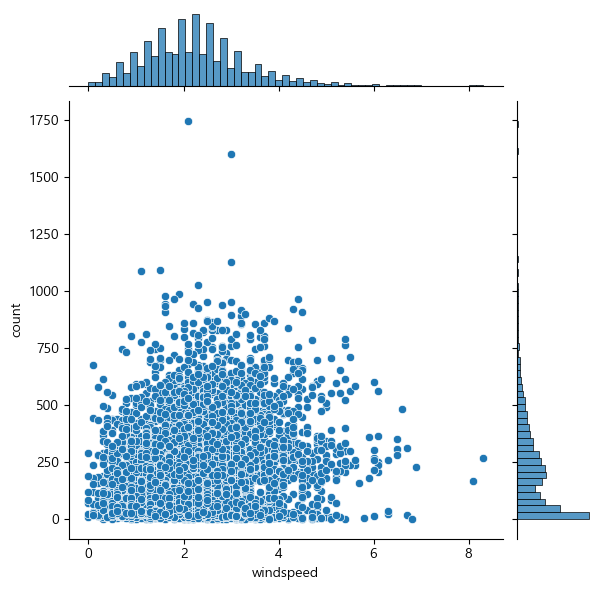

In [93]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.jointplot(x='windspeed', y='count', data=data)

<AxesSubplot:xlabel='windspeed', ylabel='count'>

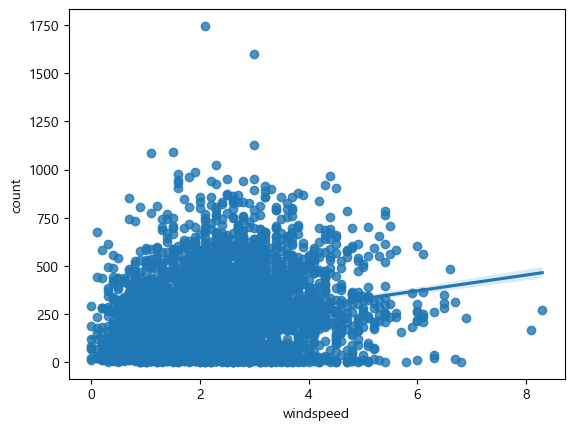

In [94]:
sns.regplot(x='windspeed', y='count', data=data)

In [95]:
spst.pearsonr(data['windspeed'], data['count'])

PearsonRResult(statistic=0.22922151636418522, pvalue=1.7134562728138145e-68)

5. 습도 데이터와 따릉이 대여량간 분석

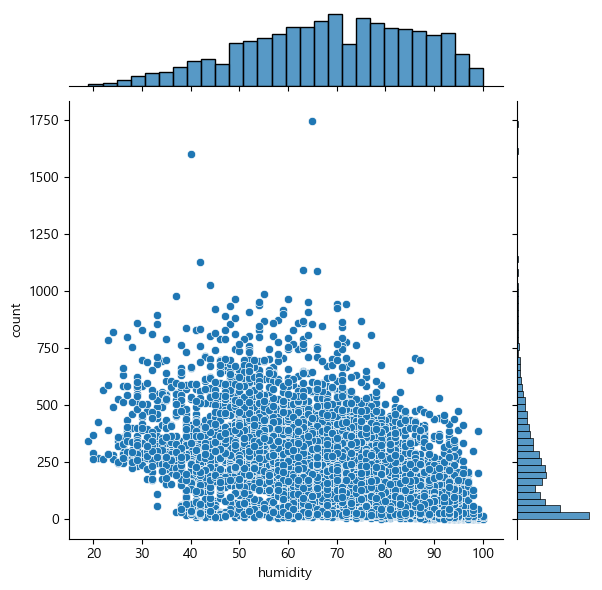

In [96]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.jointplot(x='humidity', y='count', data=data)

<AxesSubplot:xlabel='humidity', ylabel='count'>

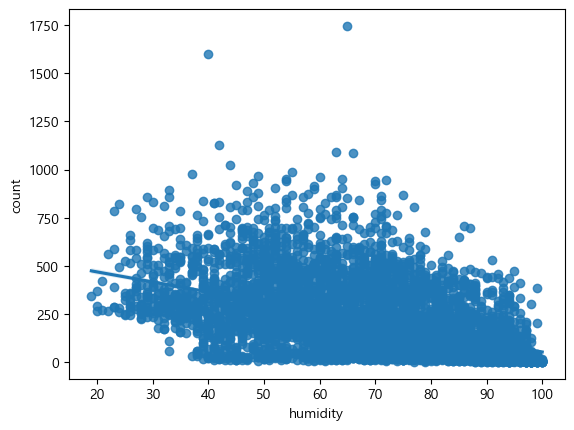

In [97]:
sns.regplot(x='humidity', y='count', data=data)

In [98]:
spst.pearsonr(data['humidity'], data['count'])

PearsonRResult(statistic=-0.48074217482491177, pvalue=0.0)

6. 시정 데이터와 따릉이 대여량간 분석

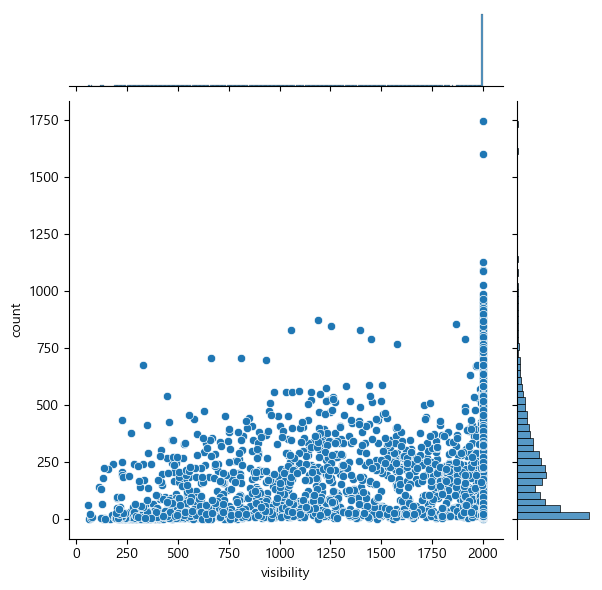

In [99]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.jointplot(x='visibility', y='count', data=data)

<AxesSubplot:xlabel='visibility', ylabel='count'>

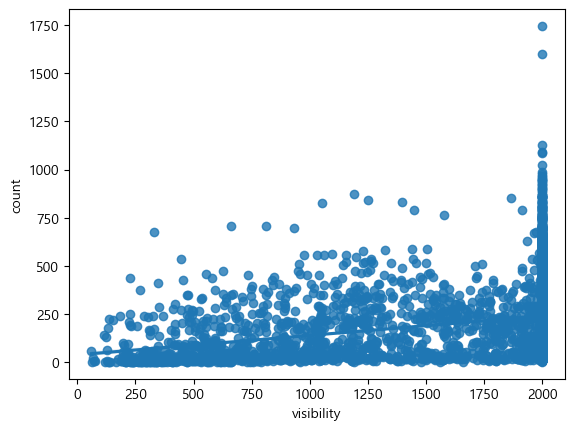

In [100]:
sns.regplot(x='visibility', y='count', data=data)

In [101]:
spst.pearsonr(data['visibility'], data['count'])

PearsonRResult(statistic=0.26207314766928064, pvalue=1.0691328205534822e-89)

7. 오존 데이터와 따릉이 대여량간 분석

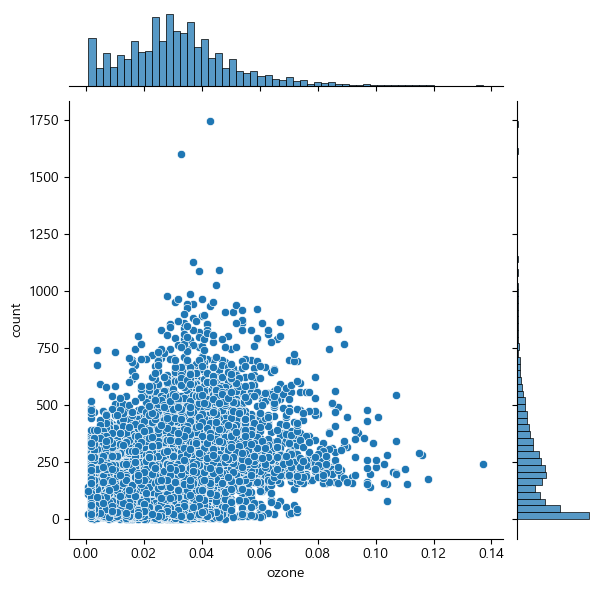

In [102]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.jointplot(x='ozone', y='count', data=data)

<AxesSubplot:xlabel='ozone', ylabel='count'>

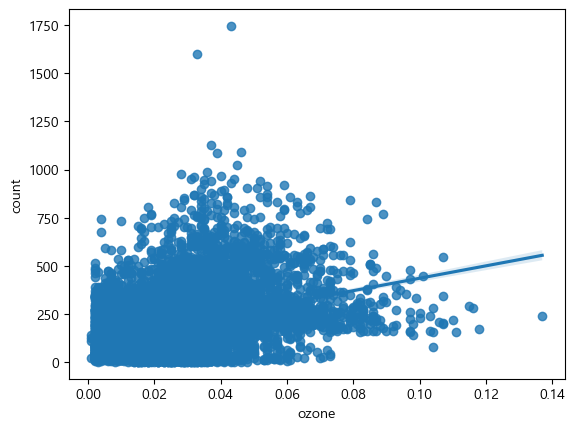

In [103]:
sns.regplot(x='ozone', y='count', data=data)

In [104]:
spst.pearsonr(data['ozone'], data['count'])

PearsonRResult(statistic=0.3143357943088431, pvalue=3.025523189274068e-130)

8. 미세먼지 농도 데이터와 따릉이 대여량간 분석

<AxesSubplot:xlabel='PM10', ylabel='count'>

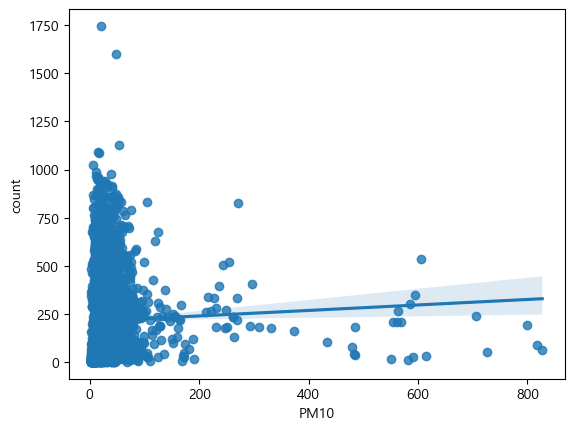

In [105]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.regplot(x='PM10', y='count', data=data)

In [106]:
temp = data.loc[data['PM10']<200]
temp.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30


<AxesSubplot:xlabel='PM10', ylabel='count'>

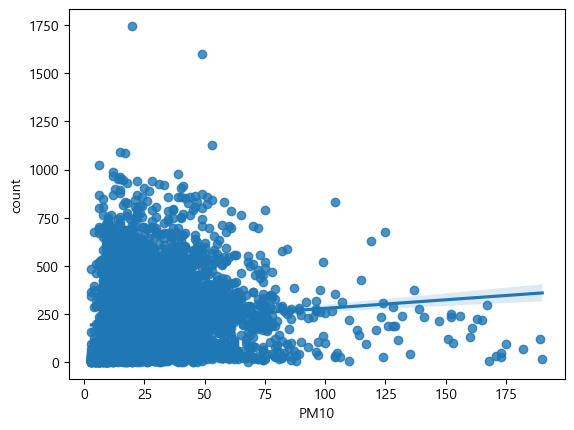

In [107]:
sns.regplot(x='PM10', y='count', data=temp)

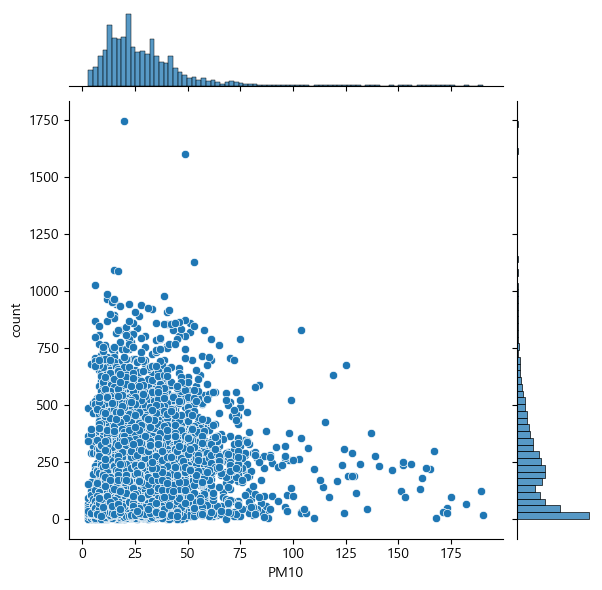

In [108]:
sns.jointplot(x='PM10', y='count', data=temp)


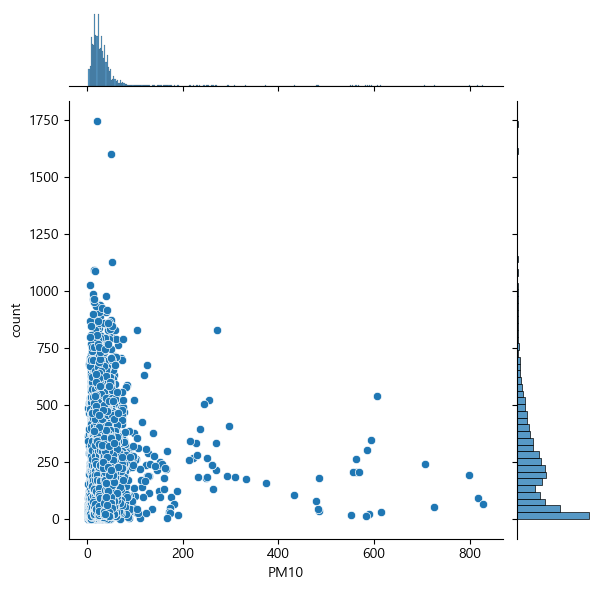

In [109]:
sns.jointplot(x='PM10', y='count', data=data)

In [110]:
spst.pearsonr(x=data['PM10'], y=data['count'])

PearsonRResult(statistic=0.03262773163856617, pvalue=0.01401178505403581)

9. 초미세먼지 농도 데이터와 따릉이 대여량간 분석

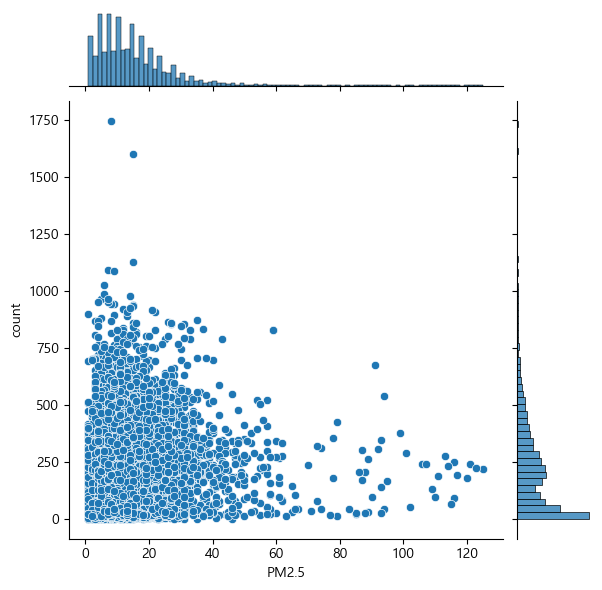

In [111]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
sns.jointplot(x='PM2.5', y='count', data=data)

<AxesSubplot:xlabel='PM2.5', ylabel='count'>

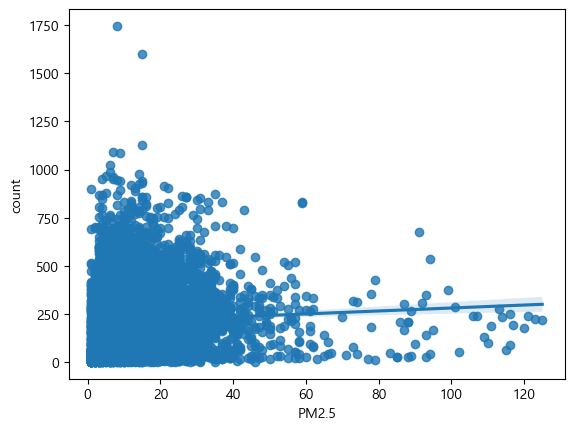

In [112]:
sns.regplot(x='PM2.5', y='count', data=data)

In [113]:
spst.pearsonr(data['PM2.5'], data['count'])

PearsonRResult(statistic=0.0529237283818275, pvalue=6.690256718116022e-05)

In [114]:
data.corr()

,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
hour,1.000000,0.045693,0.056238,0.224323,0.188384,0.000916,0.223520,-0.304854,0.090437,0.587559
PM10,0.045693,1.000000,0.692439,0.008235,-0.118791,-0.093438,0.050168,-0.091791,-0.274157,0.032628
PM2.5,0.056238,0.692439,1.000000,0.053284,-0.089720,-0.137832,-0.131809,-0.046645,-0.405487,0.052924
ozone,0.224323,0.008235,0.053284,1.000000,0.531382,-0.075875,0.350649,-0.403433,0.136367,0.314336
temperature,0.188384,-0.118791,-0.089720,0.531382,1.000000,-0.040147,0.062704,-0.086916,0.131999,0.274162
precipitation,0.000916,-0.093438,-0.137832,-0.075875,-0.040147,1.000000,0.050690,0.383162,-0.497019,-0.268666
windspeed,0.223520,0.050168,-0.131809,0.350649,0.062704,0.050690,1.000000,-0.291527,0.077832,0.229222
humidity,-0.304854,-0.091791,-0.046645,-0.403433,-0.086916,0.383162,-0.291527,1.000000,-0.490143,-0.480742
visibility,0.090437,-0.274157,-0.405487,0.136367,0.131999,-0.497019,0.077832,-0.490143,1.000000,0.262073
count,0.587559,0.032628,0.052924,0.314336,0.274162,-0.268666,0.229222,-0.480742,0.262073,1.000000


c:\Users\User\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

c:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


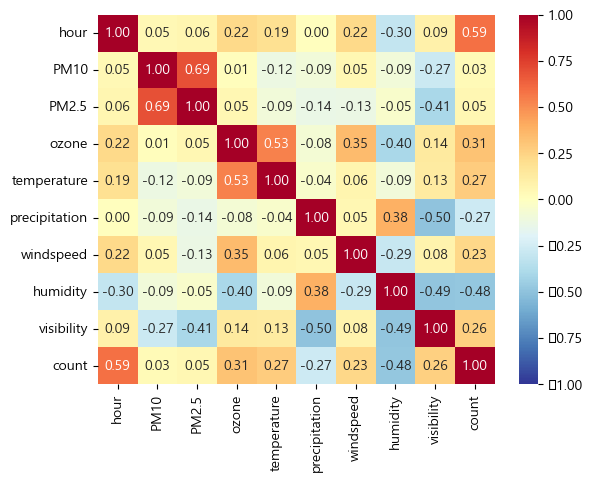

In [115]:
sns.heatmap(data.corr(), annot = True, fmt = '.2f', cmap = 'RdYlBu_r', vmin = -1, vmax = 1)  

In [116]:
data.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30


In [117]:
data['PM10'].value_counts()

18.0     181
22.0     177
20.0     177
23.0     173
19.0     172
        ... 
551.0      1
582.0      1
590.0      1
615.0      1
121.0      1
Name: PM10, Length: 180, dtype: int64

In [130]:
import numpy as np
data['PM10_2'] = pd.cut(data['PM10'], bins=[0, 30, 80, 150, np.inf], right=True, labels=['좋음', '보통', '나쁨', '매우나쁨'])

In [131]:
data.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count,PM10_2,PM10_3
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46,보통,2
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40,보통,2
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31,좋음,0
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12,좋음,0
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30,좋음,0


In [132]:
plt.rc('font', family='nanum')
sns.set(font="Malgun Gothic",#"NanumGothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     

<AxesSubplot:xlabel='PM10_2', ylabel='count'>

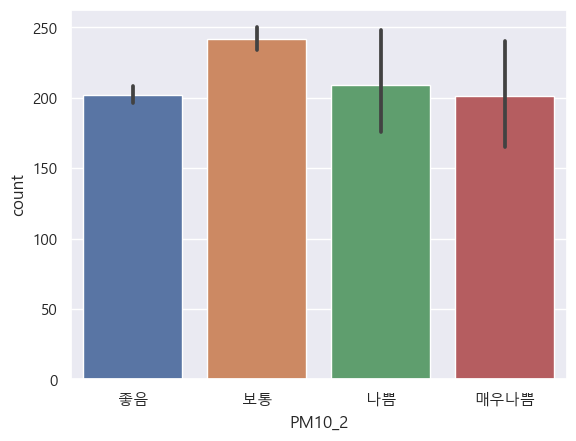

In [133]:
sns.barplot(x='PM10_2', y='count', data=data)

In [136]:
data['PM10_3'] = data['PM10_2'].map({'좋음':0, '보통':1, '나쁨':2, '매우나쁨':3})

In [150]:
good = data.loc[data['PM10_2']=='좋음', 'count']
soso = data.loc[data['PM10_2']=='보통', 'count']
bad = data.loc[data['PM10_2']=='나쁨', 'count']
sobad = data.loc[data['PM10_2']=='매우나쁨', 'count']

spst.f_oneway(good, soso, bad, sobad)

F_onewayResult(statistic=19.13462613165304, pvalue=2.4225934048663015e-12)

In [141]:
data['PM10_2'].value_counts()

좋음      3575
보통      1954
나쁨        79
매우나쁨      62
Name: PM10_2, dtype: int64

In [142]:
data['PM2.5_2'] = pd.cut(data['PM2.5'], bins=[0, 15, 35, 75, np.inf], right=True, labels=['좋음', '보통', '나쁨', '매우나쁨'])

<AxesSubplot:xlabel='PM2.5_2', ylabel='count'>

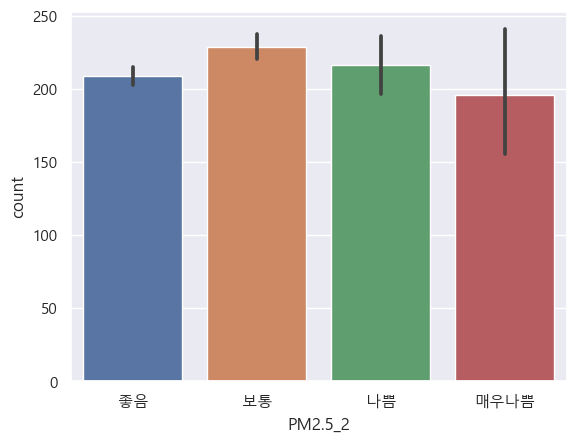

In [143]:
sns.barplot(x='PM2.5_2', y='count', data=data)

In [144]:
data['PM2.5_3'] = data['PM2.5_2'].map({'좋음':0, '보통':1, '나쁨':2, '매우나쁨':3})

In [148]:
spst.ttest_ind(data['count'], data['PM2.5_3'], equal_var=False)

Ttest_indResult(statistic=86.75583638149182, pvalue=0.0)

In [151]:
good = data.loc[data['PM2.5_2']=='좋음', 'count']
soso = data.loc[data['PM2.5_2']=='보통', 'count']
bad = data.loc[data['PM2.5_2']=='나쁨', 'count']
sobad = data.loc[data['PM2.5_2']=='매우나쁨', 'count']

spst.f_oneway(good, soso, bad, sobad)

F_onewayResult(statistic=4.746149772989161, pvalue=0.0026182223695605062)

In [146]:
data['PM2.5_2'].value_counts()

좋음      3479
보통      1890
나쁨       258
매우나쁨      43
Name: PM2.5_2, dtype: int64

### [Step5] 가설 검정

#### <font color='green'>1. 강한 관계의 변수 (대립가설 채택)</font>

#### <font color='green'>2. 약한 관계의 변수</font>


#### <font color='green'>3. 관계 없는 변수 (귀무가설 채택)</font>


### [Step6] Insight 도출